---
---
---

# 0. g2m Case Study Part 1 (Tolga Yaz)


# Goal: 

## Analysis, recommendations and identification of the company that has been performing better and is a better investment opportunity for XYZ.

# _00. Import Main Libraries_

# _01. Load the Data_

# _02. Explore the Basics of the Data_

# _03. Dealing with Potential Null Data_

# _04. Joining Tables to Obtain a "Main Table", Dedup and Some Changes_

# _05. Total and Mean Profits Per Company Per Year with Charts_

# _06. Observing the Outliers in dfMain and Dealing with Them if Necessary_

---

# _00. Import Main Libraries_

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline 
import matplotlib.pyplot as plt

---

# _01. Load the Data_

In [2]:
dfCabData = pd.read_csv("Cab_Data.csv")

# includes details of transaction for 2 cab companies

dfCabData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
dfCustomerId = pd.read_csv("Customer_ID.csv")

# a unique identifier which links the customer’s demographic details (mapping table)

dfCustomerId

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [4]:
dfTransactionId = pd.read_csv("Transaction_ID.csv")

# transaction to customer mapping and payment mode

dfTransactionId

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [5]:
dfCity = pd.read_csv("City.csv")

# list of US cities, their population and number of cab users

dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


---

# _02. Explore the Basics of the Data_

In [6]:
dfCabData.info()

dfCabData.head()

dfCabData.tail(10)

# includes details of transaction for 2 cab companies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359382,10440096,43103,Yellow Cab,WASHINGTON DC,34.24,458.64,472.5120
359383,10440097,43105,Yellow Cab,WASHINGTON DC,9.90,167.09,118.8000
359384,10440098,43105,Yellow Cab,WASHINGTON DC,21.84,358.77,285.6672
359385,10440099,43104,Yellow Cab,WASHINGTON DC,12.87,202.70,159.0732
359386,10440100,43107,Yellow Cab,WASHINGTON DC,28.71,452.19,351.4104
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [7]:
dfTransactionId.info()

# transaction to customer mapping and payment mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
dfCustomerId.head(100)

dfCustomerId.rename(columns = {"Customer ID": "CustomerId", "incomeAsUsD/Month":"incomeAsUsDperMonth" }, inplace=True)

dfCustomerId.info()

dfCustomerId[["CustomerId"]]

# a unique identifier which links the customer’s demographic details (mapping table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerId          49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,CustomerId
0,29290
1,27703
2,28712
3,28020
4,27182
...,...
49166,12490
49167,14971
49168,41414
49169,41677


In [9]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
# datetime transformation function (from int to datetime)

from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

In [11]:
# add Date of Travel as Datetime objects

i = 0

dfCabData["DateOfTravelNorm"] = dfCabData["Date of Travel"]

for datenum in dfCabData["Date of Travel"]:
    
    dfCabData["DateOfTravelNorm"][i] = from_excel_ordinal(datenum).date()
    
    i = i + 1

<ipython-input-11-8d0ea6107aca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCabData["DateOfTravelNorm"][i] = from_excel_ordinal(datenum).date()


In [12]:
# sort values according to date

dfCabData.sort_values(by = "Date of Travel", inplace=True)

dfCabData.reset_index(drop=True, inplace=True)

In [13]:
# observe the new order

dfCabData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm
0,10001340,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016-01-02
1,10000640,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02
2,10000635,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02
3,10001001,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016-01-02
4,10000171,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016-01-02
...,...,...,...,...,...,...,...,...
359387,10435011,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018-12-31
359388,10433309,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018-12-31
359389,10435915,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018-12-31
359390,10439845,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018-12-31


In [14]:
# add month of travels

i = 0

dfCabData["MonthOfTravelNorm"] = 0
dfCabData["YearOfTravelNorm"] = 0

# dfCabData.drop(["MonthOfTravelNorm","YearOfTravelNorm"], axis = 1, inplace = True)
# dfCabData["YearOfTravelNorm"][i] = date.year

for date in np.asanyarray(dfCabData["DateOfTravelNorm"]):
    dfCabData["MonthOfTravelNorm"][i] = np.int64(date.month)
    i = i + 1

<ipython-input-14-86dee3ca185b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCabData["MonthOfTravelNorm"][i] = np.int64(date.month)


In [15]:
# add year of travels

i = 0

dfCabData["YearOfTravelNorm"] = 0

# dfCabData.drop(["MonthOfTravelNorm","YearOfTravelNorm"], axis = 1, inplace = True)
# dfCabData["YearOfTravelNorm"][i] = date.year

for date in np.asanyarray(dfCabData["DateOfTravelNorm"]):
    dfCabData["YearOfTravelNorm"][i] = np.int64(date.year)
    i = i + 1

<ipython-input-15-c31b613f27ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCabData["YearOfTravelNorm"][i] = np.int64(date.year)


In [16]:
# Yellow Cab Company Data

dfCabData[dfCabData["Company"] == "Yellow Cab"]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm,MonthOfTravelNorm,YearOfTravelNorm
0,10001340,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016-01-02,1,2016
1,10000640,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,1,2016
2,10000635,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,1,2016
3,10001001,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016-01-02,1,2016
5,10001009,42371,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,2016-01-02,1,2016
...,...,...,...,...,...,...,...,...,...,...
359385,10435929,43465,Yellow Cab,SAN DIEGO CA,42.94,640.67,577.1136,2018-12-31,12,2018
359387,10435011,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018-12-31,12,2018
359389,10435915,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018-12-31,12,2018
359390,10439845,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018-12-31,12,2018


In [17]:
# Pink Cab Company Data

dfCabData[dfCabData["Company"] == "Pink Cab"]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm,MonthOfTravelNorm,YearOfTravelNorm
4,10000171,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.084,2016-01-02,1,2016
9,10000182,42371,Pink Cab,SAN DIEGO CA,2.36,47.89,23.600,2016-01-02,1,2016
12,10000187,42371,Pink Cab,SAN DIEGO CA,23.80,485.21,252.280,2016-01-02,1,2016
14,10000189,42371,Pink Cab,SAN DIEGO CA,41.76,793.63,476.064,2016-01-02,1,2016
18,10000195,42371,Pink Cab,SAN DIEGO CA,32.30,654.50,368.220,2016-01-02,1,2016
...,...,...,...,...,...,...,...,...,...,...
359372,10434035,43465,Pink Cab,SILICON VALLEY,42.55,650.14,480.815,2018-12-31,12,2018
359381,10434039,43465,Pink Cab,TUCSON AZ,26.26,427.50,296.738,2018-12-31,12,2018
359382,10436696,43465,Pink Cab,BOSTON MA,27.55,377.85,330.600,2018-12-31,12,2018
359386,10433307,43465,Pink Cab,LOS ANGELES CA,27.16,360.23,320.488,2018-12-31,12,2018


---

# 03. Dealing with Potential Null Data 1 (in dfCabData)

In [18]:
dfCabData = dfCabData.replace("?", np.NaN)

In [19]:
dfCity = dfCity.replace("?", np.NaN)

In [20]:
dfCustomerId = dfCustomerId.replace("?", np.NaN)

In [21]:
dfTransactionId = dfTransactionId.replace("?", np.NaN)

In [22]:
null_data = dfTransactionId.isnull()

In [23]:
for column in null_data.columns.values.tolist():
    print(column)
    print(null_data[column].value_counts())
    print("")

Transaction ID
False    440098
Name: Transaction ID, dtype: int64

Customer ID
False    440098
Name: Customer ID, dtype: int64

Payment_Mode
False    440098
Name: Payment_Mode, dtype: int64



In [24]:
null_data = dfCabData.isnull()

In [25]:
for column in null_data.columns.values.tolist():
    print(column)
    print(null_data[column].value_counts())
    print("")

Transaction ID
False    359392
Name: Transaction ID, dtype: int64

Date of Travel
False    359392
Name: Date of Travel, dtype: int64

Company
False    359392
Name: Company, dtype: int64

City
False    359392
Name: City, dtype: int64

KM Travelled
False    359392
Name: KM Travelled, dtype: int64

Price Charged
False    359392
Name: Price Charged, dtype: int64

Cost of Trip
False    359392
Name: Cost of Trip, dtype: int64

DateOfTravelNorm
False    359392
Name: DateOfTravelNorm, dtype: int64

MonthOfTravelNorm
False    359392
Name: MonthOfTravelNorm, dtype: int64

YearOfTravelNorm
False    359392
Name: YearOfTravelNorm, dtype: int64



In [26]:
null_data = dfCity.isnull()

In [27]:
for column in null_data.columns.values.tolist():
    print(column)
    print(null_data[column].value_counts())
    print("")

City
False    20
Name: City, dtype: int64

Population
False    20
Name: Population, dtype: int64

Users
False    20
Name: Users, dtype: int64



In [28]:
null_data = dfCustomerId.isnull()

In [29]:
for column in null_data.columns.values.tolist():
    print(column)
    print(null_data[column].value_counts())
    print("")

CustomerId
False    49171
Name: CustomerId, dtype: int64

Gender
False    49171
Name: Gender, dtype: int64

Age
False    49171
Name: Age, dtype: int64

Income (USD/Month)
False    49171
Name: Income (USD/Month), dtype: int64



## Result: There is no null data according to the analysis.

---

In [31]:
# add profit column and locate it as first column

dfCabData["Profit"] = dfCabData["Price Charged"] - dfCabData["Cost of Trip"]

profit = dfCabData['Profit']
dfCabData = dfCabData.drop(columns=['Profit'])
dfCabData.insert(loc=1, column='Profit', value=profit)

In [32]:
# save the last state of the Cab Data DataFrame

dfCabDataV2 = dfCabData.copy()

dfCabDataV2.to_csv("dfCabDataV2.csv", index = False)

In [33]:
del dfCabData

In [34]:
dfCabDataV2 = pd.read_csv("dfCabDataV2.csv")

In [35]:
dfCabDataV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction ID     359392 non-null  int64  
 1   Profit             359392 non-null  float64
 2   Date of Travel     359392 non-null  int64  
 3   Company            359392 non-null  object 
 4   City               359392 non-null  object 
 5   KM Travelled       359392 non-null  float64
 6   Price Charged      359392 non-null  float64
 7   Cost of Trip       359392 non-null  float64
 8   DateOfTravelNorm   359392 non-null  object 
 9   MonthOfTravelNorm  359392 non-null  int64  
 10  YearOfTravelNorm   359392 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 30.2+ MB


In [36]:
dfCabDataV2

,Transaction ID,Profit,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm,MonthOfTravelNorm,YearOfTravelNorm
0,10001340,66.6760,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016-01-02,1,2016
1,10000640,164.9960,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,1,2016
2,10000635,195.7548,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,1,2016
3,10001001,796.6140,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016-01-02,1,2016
4,10000171,122.0660,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016-01-02,1,2016
...,...,...,...,...,...,...,...,...,...,...,...
359387,10435011,18.8980,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018-12-31,12,2018
359388,10433309,8.1600,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018-12-31,12,2018
359389,10435915,-2.8388,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018-12-31,12,2018
359390,10439845,151.8488,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018-12-31,12,2018


---

# _04. Joining Tables to Obtain a "Main Table", Dedup and Some Changes_

In [37]:
# join dfCabDataV2 and dfTransactionIDd

dfCabDataV2 = pd.read_csv("dfCabDataV2.csv")

dfMain = dfCabDataV2.join(dfTransactionId.set_index('Transaction ID'), on='Transaction ID')

# use this if you do not want to preserve first df's index

# dfMain = dfCabDataV2.set_index('Transaction ID').join(dfTransactionId.set_index('Transaction ID'))

In [38]:
# column rename

dfMain.rename(columns={"Customer ID": "CustomerId"}, inplace = True)

dfCustomerId.rename(columns = {"Customer ID": "CustomerId", "incomeAsUsD/Month":"incomeAsUsDperMonth" }, inplace=True)

In [39]:
# join dfMain and dfCustomerId

dfMain = dfMain.join(dfCustomerId.set_index('CustomerId'), on='CustomerId')

In [40]:
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Profit              359392 non-null  float64
 2   Date of Travel      359392 non-null  int64  
 3   Company             359392 non-null  object 
 4   City                359392 non-null  object 
 5   KM Travelled        359392 non-null  float64
 6   Price Charged       359392 non-null  float64
 7   Cost of Trip        359392 non-null  float64
 8   DateOfTravelNorm    359392 non-null  object 
 9   MonthOfTravelNorm   359392 non-null  int64  
 10  YearOfTravelNorm    359392 non-null  int64  
 11  CustomerId          359392 non-null  int64  
 12  Payment_Mode        359392 non-null  object 
 13  Gender              359392 non-null  object 
 14  Age                 359392 non-null  int64  
 15  Income (USD/Month)  359392 non-nul

In [41]:
# is there a duplication in Transaction Id?

dfMain["Transaction ID"].duplicated().sum()

# No

0

In [42]:
# drop unneeded Transaction Id Column

dfMain.drop('Transaction ID', inplace=True, axis=1)

In [43]:
# add profit column to dfMain and locate it as first column

dfMain["Profit"] = dfMain["Price Charged"] - dfMain["Cost of Trip"]

profit = dfMain['Profit']
dfMain = dfMain.drop(columns=['Profit'])
dfMain.insert(loc=0, column='Profit', value=profit)

In [44]:
dfMain

,Profit,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm,MonthOfTravelNorm,YearOfTravelNorm,CustomerId,Payment_Mode,Gender,Age,Income (USD/Month)
0,66.6760,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016-01-02,1,2016,52536,Card,Male,24,10606
1,164.9960,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,1,2016,4844,Cash,Male,32,5548
2,195.7548,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,1,2016,5671,Cash,Male,24,7081
3,796.6140,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016-01-02,1,2016,2761,Card,Male,40,11462
4,122.0660,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016-01-02,1,2016,20687,Cash,Male,39,8926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,18.8980,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018-12-31,12,2018,10967,Card,Female,63,16390
359388,8.1600,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018-12-31,12,2018,8175,Card,Male,24,12571
359389,-2.8388,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018-12-31,12,2018,45644,Card,Male,28,23014
359390,151.8488,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018-12-31,12,2018,40061,Cash,Male,25,3068


In [45]:
dfMain.to_csv("dfMain.csv", index = False)

---

# _05. Total and Mean Profits Per Company Per Year with Charts_

In [46]:
dfMain = pd.read_csv("dfMain.csv")

In [47]:
dfMain

,Profit,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DateOfTravelNorm,MonthOfTravelNorm,YearOfTravelNorm,CustomerId,Payment_Mode,Gender,Age,Income (USD/Month)
0,66.6760,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016-01-02,1,2016,52536,Card,Male,24,10606
1,164.9960,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-02,1,2016,4844,Cash,Male,32,5548
2,195.7548,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016-01-02,1,2016,5671,Cash,Male,24,7081
3,796.6140,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016-01-02,1,2016,2761,Card,Male,40,11462
4,122.0660,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016-01-02,1,2016,20687,Cash,Male,39,8926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,18.8980,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018-12-31,12,2018,10967,Card,Female,63,16390
359388,8.1600,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018-12-31,12,2018,8175,Card,Male,24,12571
359389,-2.8388,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018-12-31,12,2018,45644,Card,Male,28,23014
359390,151.8488,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018-12-31,12,2018,40061,Cash,Male,25,3068


In [48]:
profitsYellow2016 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2016)]["Profit"]

In [49]:
profitsYellow2017 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2017)]["Profit"]

In [50]:
profitsYellow2018 = dfMain[(dfMain["Company"] == "Yellow Cab") & (dfMain["YearOfTravelNorm"] == 2018)]["Profit"]

In [51]:
profitsPink2016 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2016)]["Profit"]

In [52]:
profitsPink2017 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2017)]["Profit"]

In [53]:
profitsPink2018 = dfMain[(dfMain["Company"] == "Pink Cab") & (dfMain["YearOfTravelNorm"] == 2018)]["Profit"]

In [54]:
# Yellow's profits per year

profitsYellow2016 = np.asanyarray(profitsYellow2016)
profitsYellow2017 = np.asanyarray(profitsYellow2017)
profitsYellow2018 = np.asanyarray(profitsYellow2018)

In [55]:
# Pink's profits per year

profitsPink2016 = np.asanyarray(profitsPink2016)
profitsPink2017 = np.asanyarray(profitsPink2017)
profitsPink2018 = np.asanyarray(profitsPink2018)

In [56]:
# Yellow and Pink's total profits per year

totProfitYellow2016 = np.sum(profitsYellow2016)
totProfitYellow2017 = np.sum(profitsYellow2017)
totProfitYellow2018 = np.sum(profitsYellow2018)

totProfitPink2016 = np.sum(profitsPink2016)
totProfitPink2017 = np.sum(profitsPink2017)
totProfitPink2018 = np.sum(profitsPink2018)

In [57]:
# Yellow and Pink's mean profits per year

meanProfitYellow2016 = np.mean(profitsYellow2016)
meanProfitYellow2017 = np.mean(profitsYellow2017)
meanProfitYellow2018 = np.mean(profitsYellow2018)

meanProfitPink2016 = np.mean(profitsPink2016)
meanProfitPink2017 = np.mean(profitsPink2017)
meanProfitPink2018 = np.mean(profitsPink2018)

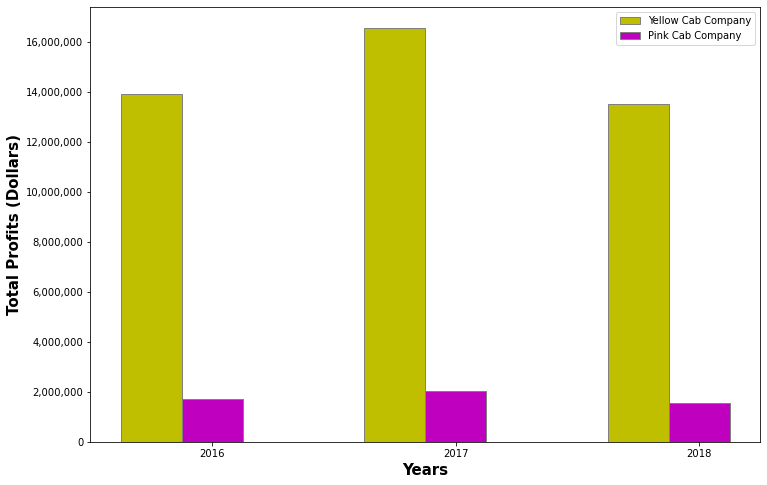

In [58]:
# Charts 1 (Total Profits per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
totProfitsPerYearYellow = [totProfitYellow2016, totProfitYellow2017, totProfitYellow2018]
totProfitsPerYearPink = [totProfitPink2016, totProfitPink2017, totProfitPink2018]

# Set position of bar on X axis
br1 = np.arange(len(totProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, totProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, totProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Profits (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(totProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 1a: Yellow is much better than Pink in terms of Total Profits in all of the years.
## Result 1b: Both companies' total profits decreased from 2017 to 2018.

---

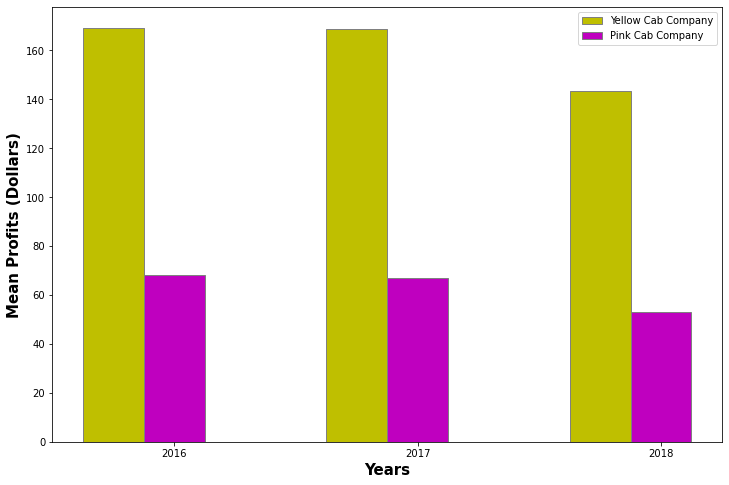

In [59]:
# Charts 2 (Mean Profits per Year per Company)

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
meanProfitsPerYearYellow = [meanProfitYellow2016, meanProfitYellow2017, meanProfitYellow2018]
meanProfitsPerYearPink = [meanProfitPink2016, meanProfitPink2017, meanProfitPink2018]

# Set position of bar on X axis
br1 = np.arange(len(meanProfitsPerYearYellow))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, meanProfitsPerYearYellow, color ='y', width = barWidth,
edgecolor ='grey', label ='Yellow Cab Company')
plt.bar(br2, meanProfitsPerYearPink, color ='m', width = barWidth,
edgecolor ='grey', label ='Pink Cab Company')


# Adding labels and xtics

plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean Profits (Dollars)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(meanProfitsPerYearYellow))],
['2016', '2017', '2018'])

from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places

plt.legend()
plt.show()


---

## Result 2a: Yellow is much better than Pink in terms of Mean Profits in all of the years as expected.

## Result 2b: Both companies' mean profits decreased from 2017 to 2018.

---

# _06. Observing the Outliers in dfMain and Dealing with Them if Necessary_

# > continue from part 2